<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Deep Learning Foundation Project - Air Quality Index Prediction</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2022-DL-Foundation-Air_Quality_Index_Prediction/blob/SMART_AI_Learning/AirThinx.png?raw=true"></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)<br>
  - **1.1** [**Problem Statement**](#section11)<br>
  - **1.2** [**Importing Libraries**](#section12)<br>
  
**2**. [**The Dataset**](#section2)<br>
  - **2.1** [**Load Dataset**](#section21)<br>
  - **2.2** [**Data Description**](#section22)<br>
  - **2.3** [**Dataset Structure**](#section23)<br>
  
**3**. [**Data Pre-Processing**](#section3)<br>
  - **3.1** [**Data Pre-Profiling**](#section31)<br>
  - **3.2** [**Data Pre-Processing**](#section32)<br>
  - **3.3** [**Data Post-Profiling**](#section26)<br>
  
**4**. [**Exploratory Data Analysis**](#section4)<br>

**5**. [**The Model**](#section5)<br>

<a name=section1></a>

----
## **1. Introduction**
----

- Your client for this project is an Air Quality Monitoring company.

    - Due to an increase in the number of vehicles in your city, the air pollution level is increasing and is consequently affecting nature.

    - Project task is to predict the air pollution index based on the historical data provided to help the government and the organization to administer the same.

    - One of the key measurements in this process is AQI (Air Quality Index).

**<h3>Current Scenario:</h3>**

- The air_pollution_index depends on certain parameters such as humidity, wind speed and direction, temperature, visibility, and more on a particular date at a mentioned time.

---
<a name = section11></a>
### **1.1 Problem Statement**
---

- **The current process suffers from the following problems:**
    - There is no denying that air pollution is impacting nature and the climate.

    - An Air Quality Index (AQI) value of 201 to 300 translates to very unhealthy air quality conditions for survival, with high levels of health concern.
    - AQI depends on various factors, which is why detecting it manually accurately can be a tedious and time consuming task

- The company has hired you as a data science consultant.

    - They want to automate the process of predicting Air Quality Index (AQI) through various measurements and factors.


### **Your Role**

- You are given a dataset containing certain parameters such as humidity, wind speed and direction, temperature, visibility, and more on a particular date at a mentioned time.

- Your task is to build a regression model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

### **Project Deliverables**
- Deliverable: **Predict the Air Quality Index (AQI) of City**

- Machine Learning Task: **Regression**

- Target Variable: **air_pollution_index**

### **Evaluation Metric**

- The model evaluation will be based on the RMSE score.

<center><img src="https://github.com/girishksahu/INSAID2022-DL-Foundation-Air_Quality_Index_Prediction/blob/SMART_AI_Learning/aqi_mini.png?raw=true" width="500" /></center>

---
<a name = section12></a>
### **1.2 Importing Libraries**
---

In [21]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ywle_xq6
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ywle_xq6


In [22]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression   
# Importing WordCloud for text data visualization
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV                    # To tune the models   

In [23]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [24]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [25]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

<a name=section2></a>

----
## **2. The Dataset**
----

- The Train dataset contains all the necessary information which might affect the air pollution index.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 27000 | 15 | TBD MB| 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **date_time**   | Date Time value of the sample. |
|02| **is_holiday**      | Whether the date is a holiday. If yes, then specifies the name of the holiday.|
|03| **humidity**      | Humidity value.|
|04| **wind_speed**      | Wind Speed value.|
|05| **wind_direction**      | Wind Direction value.|
|07| **dew_point**      | Dew Point value.|
|08| **visibility_in_miles**      | Visibility in Miles value.|
|09| **temperature**      | Temperature value.|
|10| **rain_p_h**      | Rain per hour value.|
|11| **snow_p_h**      | Snow per hour value.|
|12| **clouds_all**      | Clouds all value..|
|13| **weather_type**      | Weather Type.|
|14| **air_pollution_index**      | Air Pollution Index value.|
|15| **traffic_volume**      | Traffic Volume.|


- The **Test dataset** contains all the necessary information which might affect the air pollution index and **Air Pollution Index** column value need to be predicted.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 6750 | 14 | TBD MB | 

<br>


<a name=section21></a>

### **2.1 Load Dataset**

- Load dataset and check shape of dataset.

In [26]:
# Load train dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-Foundation-Air_Quality_Index_Prediction/SMART_AI_Learning/air_train.csv", index_col='id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', train_df.shape)

# Output first 10 data rows
train_df.head(10)


Shape of the Training and Validation dataset: (27000, 14)


,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
id,,,,,,,,,,,,,,
18707,10/1/2015 5:00,None,77,7,296,1,1,278.270,0.0,0.00,1,Clear,162,2922
31577,3/8/2017 2:00,None,36,3,140,6,6,272.410,0.0,0.00,90,Snow,224,303
14307,5/13/2014 19:00,None,92,0,112,9,9,284.150,0.0,0.00,32,Clouds,135,3484
20164,12/23/2015 14:00,None,92,3,150,4,4,273.740,0.0,0.32,90,Rain,135,5182
11989,2/3/2014 22:00,None,85,2,220,5,5,257.470,0.0,0.00,75,Clouds,183,1628
22666,4/22/2016 2:00,None,77,3,231,4,4,276.542,0.0,0.00,0,Clear,182,442
28591,11/28/2016 10:00,None,88,6,190,2,2,284.020,0.0,0.00,90,Thunderstorm,205,4052
11920,2/1/2014 1:00,None,70,3,270,9,9,256.760,0.0,0.00,0,Clear,292,644
3188,1/27/2013 5:00,None,100,6,100,9,9,256.120,0.0,0.00,20,Clouds,201,462


In [27]:
# Check for any missing values
any(train_df.isna().sum())

False

In [28]:
#check if any duplicate row
any(train_df.duplicated())

False

In [29]:
# Load test dataset
test_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-Foundation-Air_Quality_Index_Prediction/SMART_AI_Learning/air_test.csv", index_col='id')

# Get the dimesions of data
print('Shape of Test dataset:', test_df.shape)

# Output first 10 data rows
test_df.head(10)

Shape of Test dataset: (6750, 13)


,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
id,,,,,,,,,,,,,
8419,8/14/2013 22:00,None,76,2,140,6,6,287.82,0.0,0.0,0,Clear,2014
21188,2/9/2016 14:00,None,74,4,170,8,8,264.28,0.0,0.0,1,Clear,5384
15443,7/12/2014 11:00,None,52,7,308,8,8,296.57,0.0,0.0,92,Drizzle,4144
5952,5/11/2013 21:00,None,94,3,145,6,6,288.93,0.0,0.0,1,Clear,2147
28213,11/18/2016 18:00,None,77,3,355,9,9,273.59,0.0,0.0,90,Snow,3486
21072,2/5/2016 17:00,None,66,3,347,7,7,270.08,0.0,0.0,90,Haze,6303
22286,4/6/2016 21:00,None,29,3,311,1,1,276.01,0.0,0.0,90,Drizzle,2476
11089,12/30/2013 8:00,None,68,1,302,5,5,250.47,0.0,0.0,90,Clouds,4385
5118,4/14/2013 8:00,None,93,5,340,9,9,271.56,0.0,0.0,90,Mist,1569


In [30]:
# Check for any missing values
any(test_df.isna().sum())

False

In [31]:
#check if any duplicate row
any(test_df.duplicated())

False

<a name=section22></a>

### **2.2 Data Description**

- Get **information about the data** and capture observations.

In [32]:
#Basic statistical details for numeric variables
train_df.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,27000.0,280.091740,13.306469,0.0,271.75,280.16,290.6025,308.24
rain_p_h,27000.0,0.525685,59.842511,0.0,0.00,0.00,0.0000,9831.30
snow_p_h,27000.0,0.000291,0.009146,0.0,0.00,0.00,0.0000,0.51


**Observations:**
- Total count for all numeric variables is same as 27000 which confirms that there are no missing values.

In [33]:
#Basic statistical details for numeric variables
train_df.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
humidity,27000.0,71.174630,16.875376,13.0,60.00,72.0,85.0,100.0
wind_speed,27000.0,3.377889,2.056855,0.0,2.00,3.0,5.0,16.0
wind_direction,27000.0,199.209963,99.772490,0.0,130.00,200.0,290.0,360.0
visibility_in_miles,27000.0,4.992444,2.571043,1.0,3.00,5.0,7.0,9.0
dew_point,27000.0,4.992444,2.571043,1.0,3.00,5.0,7.0,9.0
clouds_all,27000.0,50.457111,38.867501,0.0,1.00,64.0,90.0,100.0
air_pollution_index,27000.0,154.410556,83.855736,10.0,82.00,155.0,227.0,299.0
traffic_volume,27000.0,3238.616185,1990.372812,0.0,1162.75,3339.0,4918.0,7241.0


**Observations:**
- Total count for all numeric variables is same as 27000 which confirms that there are no missing values.

In [34]:
#Basic statistical details for categorical variables
train_df.describe(include=[object]).transpose()

,count,unique,top,freq
date_time,27000,23453,4/22/2013 19:00,5
is_holiday,27000,12,None,26964
weather_type,27000,11,Clouds,8956


**Observations:**
- Total count for all categorical variables is same as 27000 which confirms that there are no missing values.

<a name=section23></a>

### **2.3 Dataset Structure**

- Get **information about the dataset structure** and capture observations.

In [35]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 18707 to 33003
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            27000 non-null  object 
 1   is_holiday           27000 non-null  object 
 2   humidity             27000 non-null  int64  
 3   wind_speed           27000 non-null  int64  
 4   wind_direction       27000 non-null  int64  
 5   visibility_in_miles  27000 non-null  int64  
 6   dew_point            27000 non-null  int64  
 7   temperature          27000 non-null  float64
 8   rain_p_h             27000 non-null  float64
 9   snow_p_h             27000 non-null  float64
 10  clouds_all           27000 non-null  int64  
 11  weather_type         27000 non-null  object 
 12  air_pollution_index  27000 non-null  int64  
 13  traffic_volume       27000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.1+ MB


**Observations:**
- Total count for all variables is same as 27000 which confirms that there are no missing values.
- There are three categorical (Object) variable and rest are Numeric (Float and Int) variable.
- date_time variable may require conversion to right Dtype.

In [36]:
# Columns list can be handy and useful for further steps
train_df.columns

Index(['date_time', 'is_holiday', 'humidity', 'wind_speed', 'wind_direction',
       'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h',
       'snow_p_h', 'clouds_all', 'weather_type', 'air_pollution_index',
       'traffic_volume'],
      dtype='object')

In [37]:
# Get list of categorical variables
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['date_time', 'is_holiday', 'weather_type']


In [38]:
# Get list of numerical variables
s = (train_df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['temperature', 'rain_p_h', 'snow_p_h']


In [39]:
# Get list of numerical variables
s = (train_df.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
['humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point', 'clouds_all', 'air_pollution_index', 'traffic_volume']


<a name = section3></a>

---
# **3. Data Pre-Processing**
---

<a name = section31></a>
### **3.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [40]:
# profile = ProfileReport(df=train_df)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- The report shows that there are a **total** of **15 features** out of which 12 are **numerical** and 3 are **categorical** type.

<a name = section32></a>
### **3.2 Data Pre-Processing**

- We need to pre process few features before EDA and Model Evaluation as needed

In [41]:
# convert date_time from object type to datetime type
train_df['date_time']= pd.to_datetime(train_df['date_time'])

In [42]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 18707 to 33003
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            27000 non-null  datetime64[ns]
 1   is_holiday           27000 non-null  object        
 2   humidity             27000 non-null  int64         
 3   wind_speed           27000 non-null  int64         
 4   wind_direction       27000 non-null  int64         
 5   visibility_in_miles  27000 non-null  int64         
 6   dew_point            27000 non-null  int64         
 7   temperature          27000 non-null  float64       
 8   rain_p_h             27000 non-null  float64       
 9   snow_p_h             27000 non-null  float64       
 10  clouds_all           27000 non-null  int64         
 11  weather_type         27000 non-null  object        
 12  air_pollution_index  27000 non-null  int64         
 13  traffic_volume       27000 

<a name = section33></a>
### **3.3 Data Post-Profiling**

- We can run the pandas profiling report to get latest information

In [43]:
# post_profile=ProfileReport(df=train_df)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = section4></a>

---
# **4. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

What is the correlation between numeric variables?

Text(0.5, 1.0, 'Correlation between Numerical features')

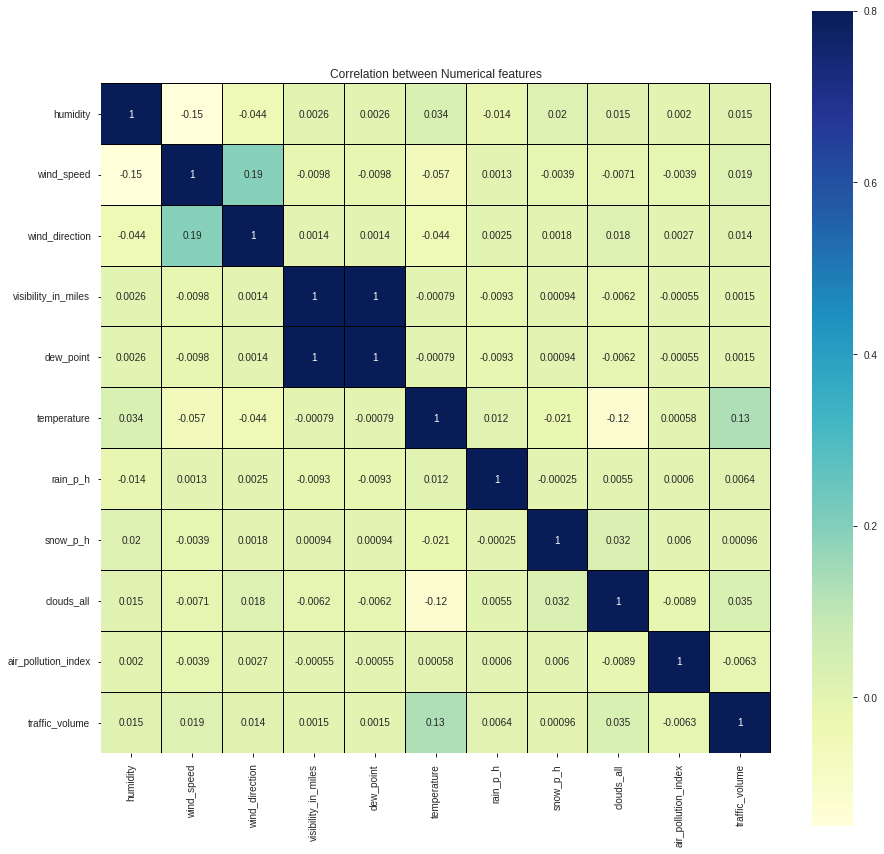

In [44]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = train_df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

**Observations:**

- Not much correlation between variables but there is perfect positive correlation between **visibility_in_miles** and **dew_point**

What is the relationship between numeric variables?

<Figure size 3600x1800 with 0 Axes>

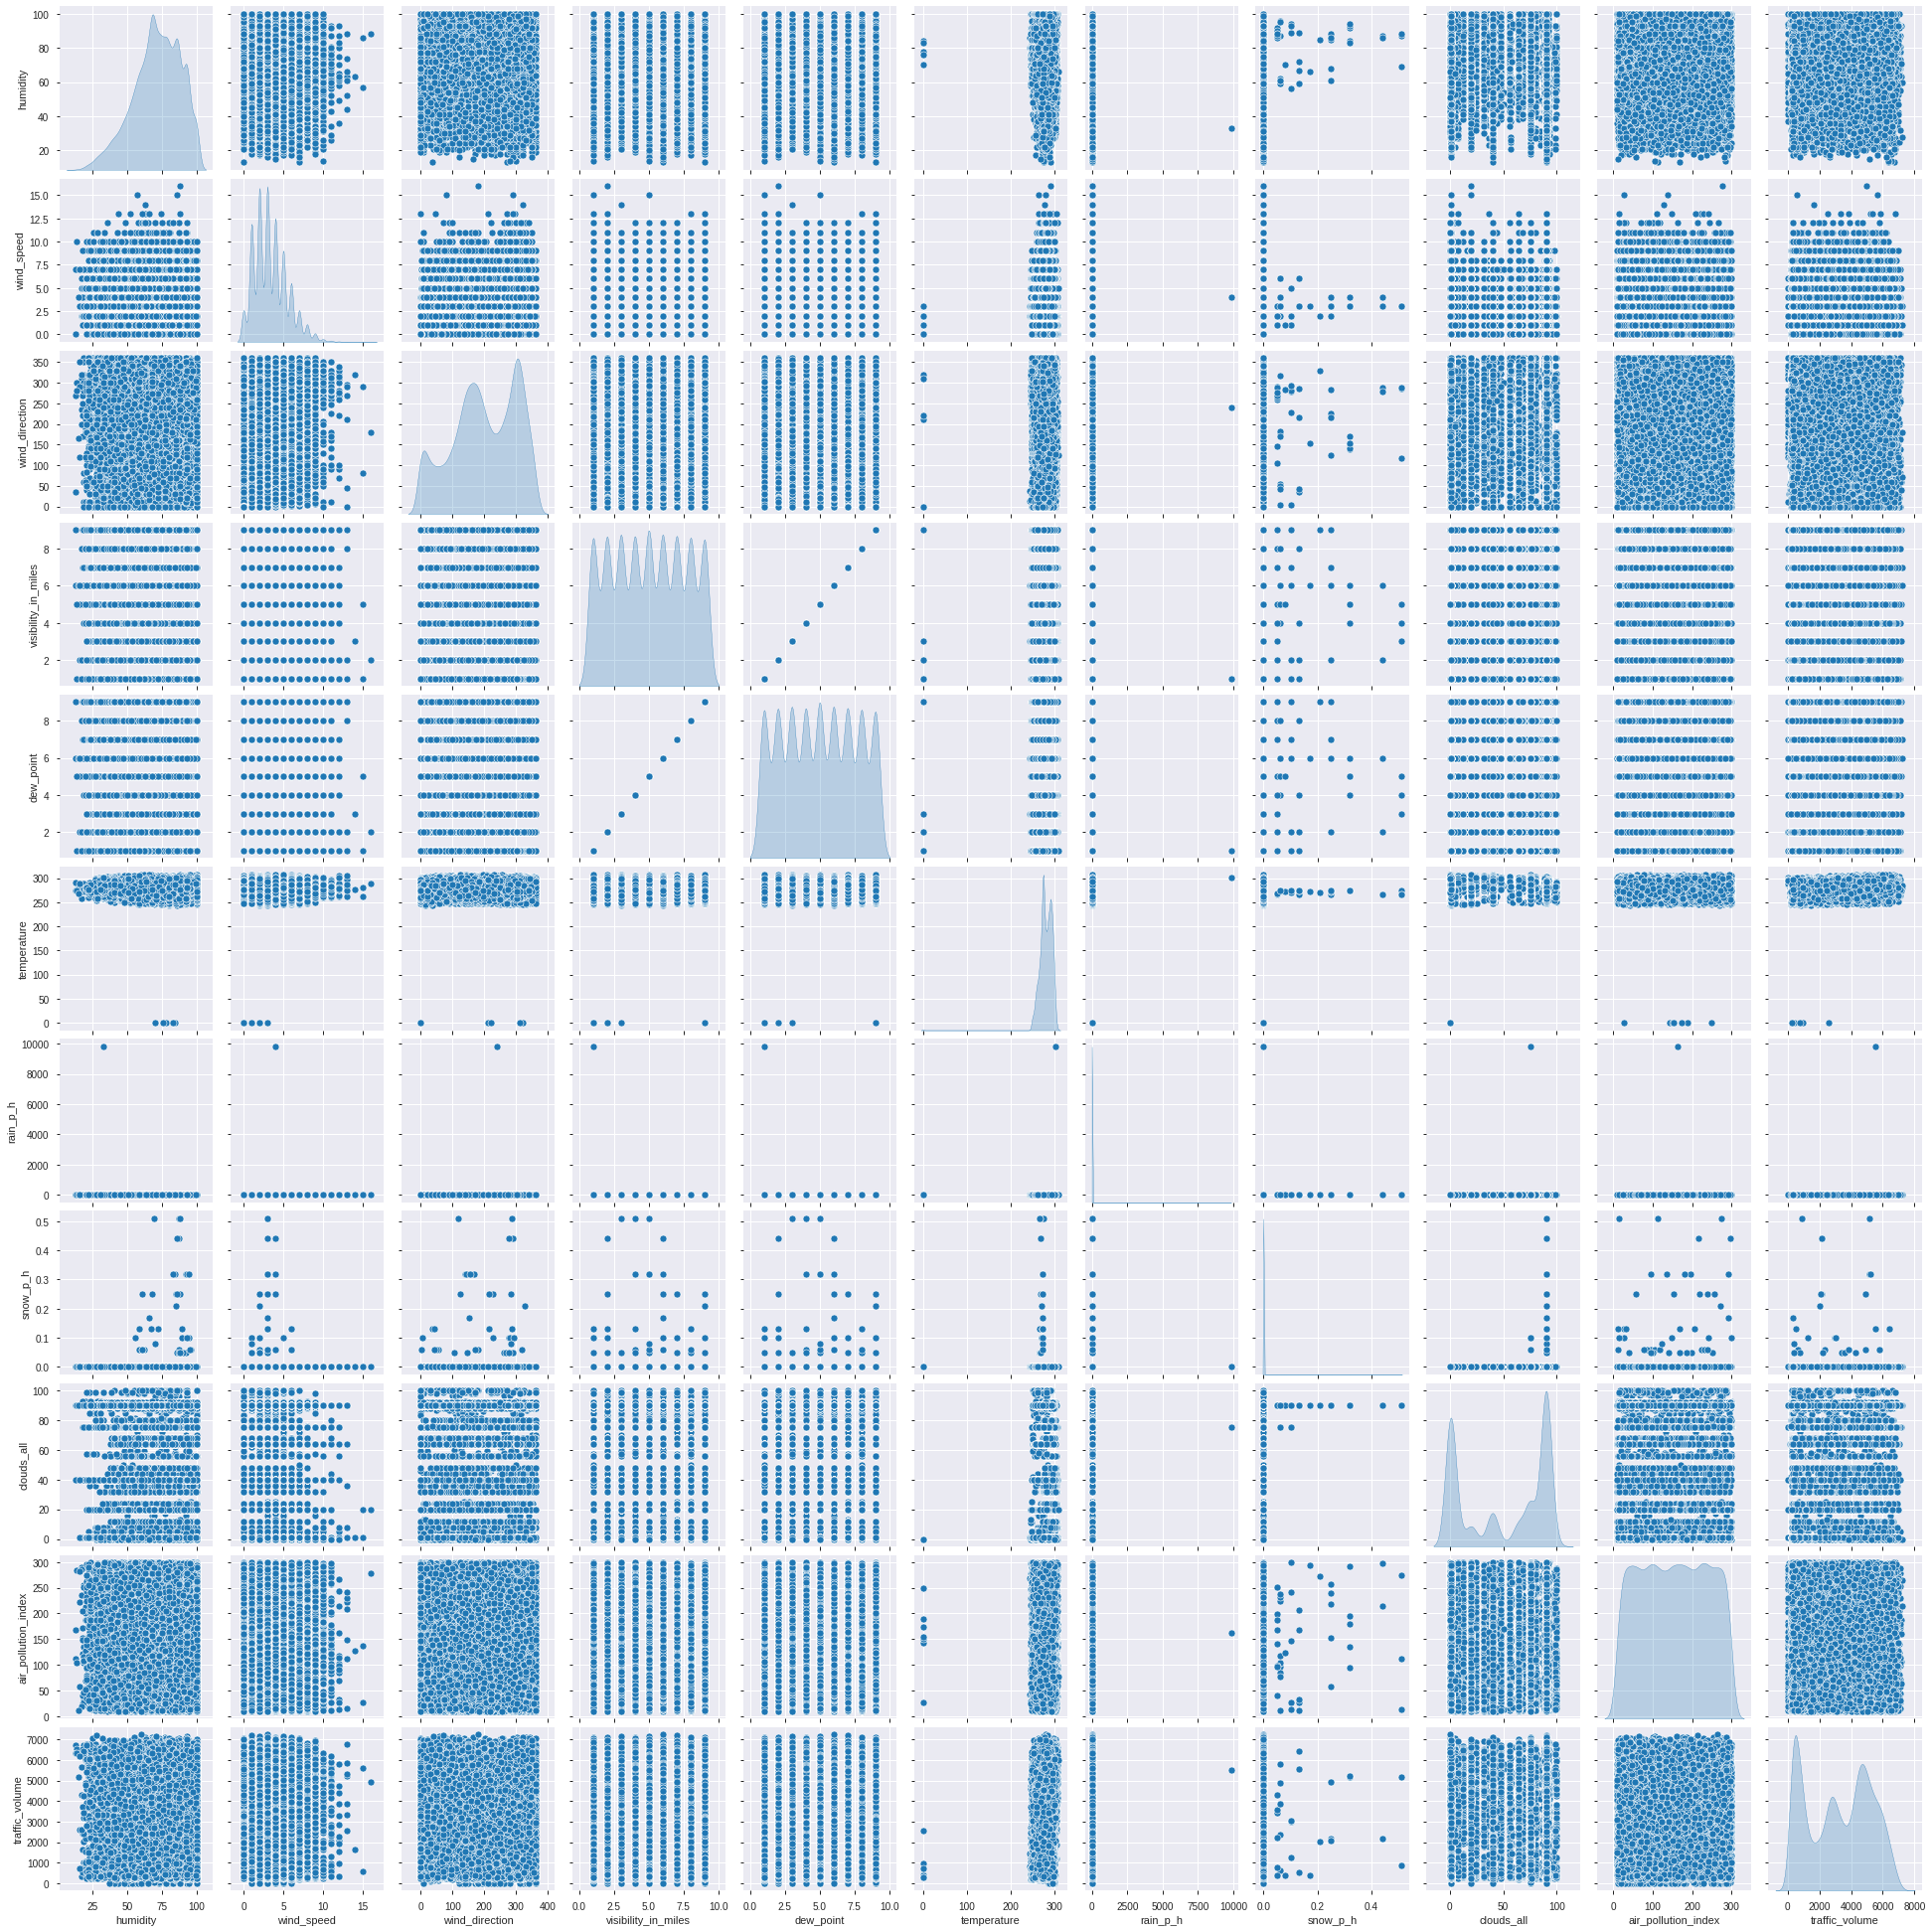

In [45]:
# plot pairwise relationship in a dataset
plt.figure(figsize=(50,25))
sns.pairplot(data=train_df,palette='rainbow',diag_kind='kde')
plt.show()

**Observations:**

- TBD

In [46]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
train_df.cov()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
humidity,284.778311,-5.198368,-74.298677,0.114842,0.114842,7.551245,-13.751154,0.003017,9.675830,2.874819,4.976626e+02
wind_speed,-5.198368,4.230653,39.317114,-0.051628,-0.051628,-1.557488,0.165378,-0.000073,-0.564388,-0.676466,7.639146e+01
wind_direction,-74.298677,39.317114,9954.549751,0.369156,0.369156,-58.901879,14.996713,0.001638,68.870056,22.195917,2.861373e+03
visibility_in_miles,0.114842,-0.051628,0.369156,6.610262,6.610262,-0.027117,-1.434565,0.000022,-0.616273,-0.119643,7.594455e+00
dew_point,0.114842,-0.051628,0.369156,6.610262,6.610262,-0.027117,-1.434565,0.000022,-0.616273,-0.119643,7.594455e+00
temperature,7.551245,-1.557488,-58.901879,-0.027117,-0.027117,177.062109,9.591853,-0.002602,-63.559329,0.650508,3.433436e+03
rain_p_h,-13.751154,0.165378,14.996713,-1.434565,-1.434565,9.591853,3581.126154,-0.000135,12.711246,2.988133,7.677023e+02
snow_p_h,0.003017,-0.000073,0.001638,0.000022,0.000022,-0.002602,-0.000135,0.000084,0.011334,0.004609,1.743608e-02
clouds_all,9.675830,-0.564388,68.870056,-0.616273,-0.616273,-63.559329,12.711246,0.011334,1510.682630,-29.076709,2.732083e+03
air_pollution_index,2.874819,-0.676466,22.195917,-0.119643,-0.119643,0.650508,2.988133,0.004609,-29.076709,7031.784510,-1.057920e+03


**Observations:**

- TBD

What is the trend for Air Pollution Index?

In [47]:
# group by date_time without index
data_column=['air_pollution_index','traffic_volume']
data_by_date = train_df.groupby(by = 'date_time', as_index = False)[data_column].agg('max')

In [48]:
data_by_date.head()

,date_time,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,121,5545
1,2012-10-02 10:00:00,178,4516
2,2012-10-02 12:00:00,20,5026
3,2012-10-02 13:00:00,281,4918
4,2012-10-02 14:00:00,23,5181


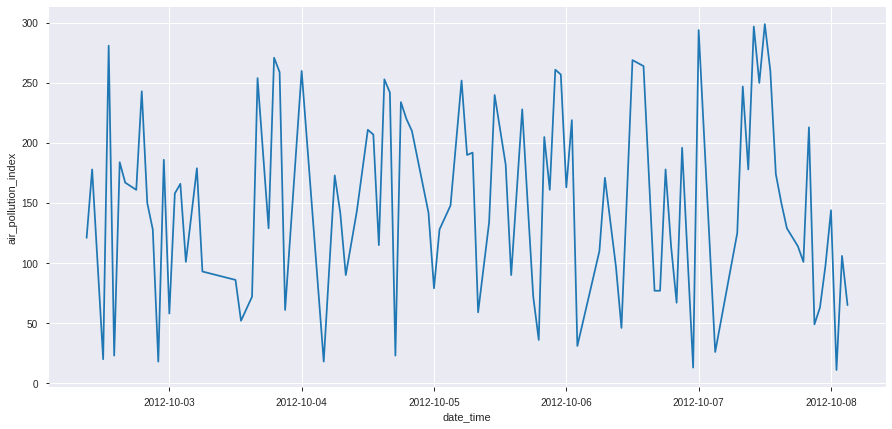

In [49]:
# trend for air_pollution_index 
figure = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'date_time', y= 'air_pollution_index', data = data_by_date[:100])
plt.show()

**Observations:**

- TBD

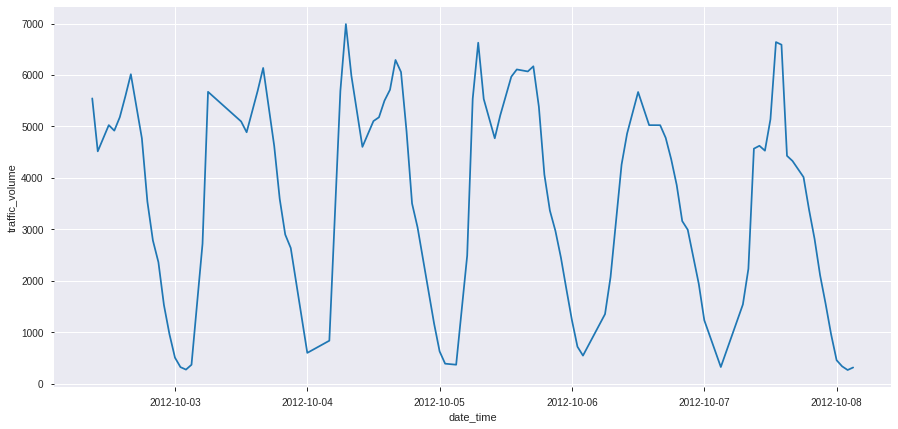

In [50]:
# trend for traffic_volume 
figure = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'date_time', y= 'traffic_volume', data = data_by_date[:100])
plt.show()

**Observations:**

- TBD

What is the distribution for weather_type?

In [51]:
train_df['weather_type'].value_counts()

Clouds          8956
Clear           7360
Mist            3265
Rain            3193
Snow            1609
Drizzle          972
Haze             713
Thunderstorm     460
Fog              456
Smoke             13
Squall             3
Name: weather_type, dtype: int64

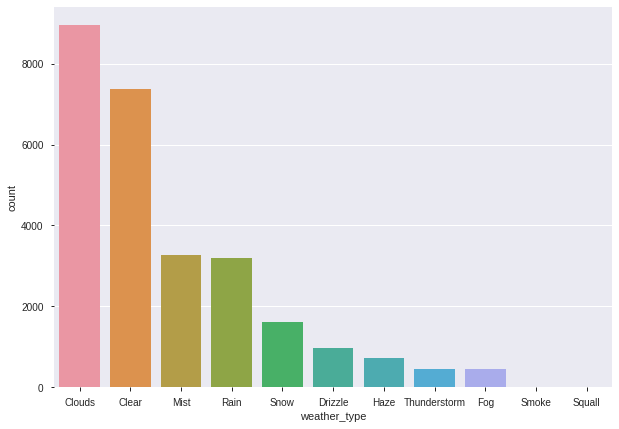

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(x='weather_type',data=train_df,order=train_df['weather_type'].value_counts().index)
plt.show()

What is the distribution for is_holiday?

In [53]:
train_df['is_holiday'].value_counts()

None                         26964
Thanksgiving Day                 5
New Years Day                    5
Christmas Day                    4
Labor Day                        4
Veterans Day                     4
Columbus Day                     4
Memorial Day                     3
Washingtons Birthday             2
State Fair                       2
Martin Luther King Jr Day        2
Independence Day                 1
Name: is_holiday, dtype: int64

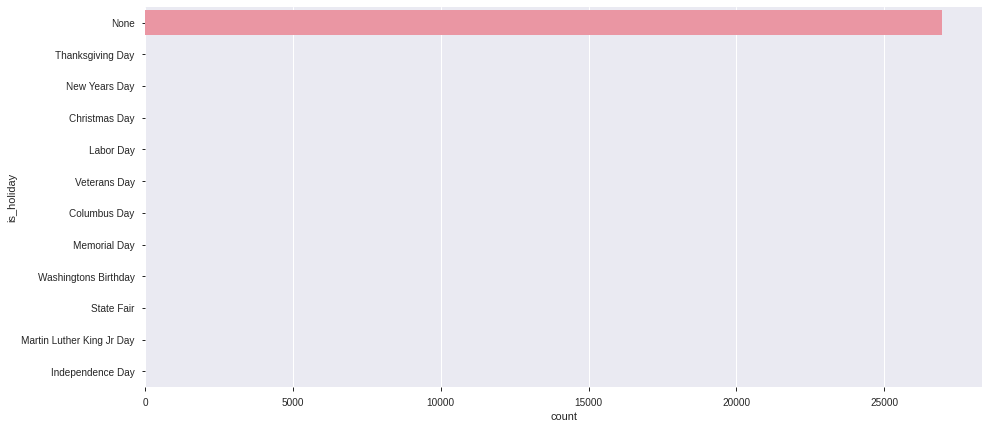

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(y='is_holiday',data=train_df,order=train_df['is_holiday'].value_counts().index)
plt.show()

What is the distribution with respect to weather_type?

In [55]:
data_column=['humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point', 'clouds_all', 'air_pollution_index', 'traffic_volume']
train_df.groupby(by=['weather_type'], as_index=False)[data_column].agg('median').sort_values(by ='air_pollution_index', ascending = False)

,weather_type,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,clouds_all,air_pollution_index,traffic_volume
9,Squall,77.0,1.0,206.0,3.0,3.0,75.0,195.0,3216.0
7,Smoke,65.0,3.0,311.0,5.0,5.0,40.0,176.0,2182.0
3,Fog,73.0,3.0,202.5,5.0,5.0,75.0,157.0,2595.0
0,Clear,72.0,3.0,190.0,5.0,5.0,1.0,156.0,3102.0
8,Snow,74.0,3.0,220.0,5.0,5.0,90.0,156.0,3047.0
1,Clouds,71.0,3.0,203.0,5.0,5.0,75.0,155.0,3886.5
6,Rain,73.0,3.0,190.0,5.0,5.0,90.0,155.0,3437.0
5,Mist,74.0,3.0,206.0,5.0,5.0,90.0,154.0,2792.0
10,Thunderstorm,73.0,3.0,200.0,5.0,5.0,90.0,150.5,2657.5
2,Drizzle,74.0,3.0,190.0,5.0,5.0,90.0,149.5,3263.0


In [56]:
train_df.groupby(by=['weather_type'], as_index=False)[data_column].agg('median').sort_values(by ='traffic_volume', ascending = False)

,weather_type,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,clouds_all,air_pollution_index,traffic_volume
4,Haze,72.0,3.0,230.0,5.0,5.0,90.0,145.0,4143.0
1,Clouds,71.0,3.0,203.0,5.0,5.0,75.0,155.0,3886.5
6,Rain,73.0,3.0,190.0,5.0,5.0,90.0,155.0,3437.0
2,Drizzle,74.0,3.0,190.0,5.0,5.0,90.0,149.5,3263.0
9,Squall,77.0,1.0,206.0,3.0,3.0,75.0,195.0,3216.0
0,Clear,72.0,3.0,190.0,5.0,5.0,1.0,156.0,3102.0
8,Snow,74.0,3.0,220.0,5.0,5.0,90.0,156.0,3047.0
5,Mist,74.0,3.0,206.0,5.0,5.0,90.0,154.0,2792.0
10,Thunderstorm,73.0,3.0,200.0,5.0,5.0,90.0,150.5,2657.5
3,Fog,73.0,3.0,202.5,5.0,5.0,75.0,157.0,2595.0


What is the distribution with respect to is_holiday?

In [57]:
train_df.groupby(by=['is_holiday'], as_index=False)[data_column].agg('median').sort_values(by ='air_pollution_index', ascending = False)

,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,clouds_all,air_pollution_index,traffic_volume
4,Martin Luther King Jr Day,71.5,3.0,199.5,2.0,2.0,32.5,276.5,589.0
3,Labor Day,62.5,5.5,140.0,6.5,6.5,90.0,204.0,1052.5
6,New Years Day,88.0,4.0,280.0,2.0,2.0,90.0,192.0,1439.0
11,Washingtons Birthday,66.5,6.0,305.5,1.5,1.5,90.0,189.0,684.0
8,State Fair,56.5,4.0,189.5,5.0,5.0,6.5,188.0,658.0
7,None,72.0,3.0,200.0,5.0,5.0,64.0,155.0,3345.0
9,Thanksgiving Day,68.0,3.0,313.0,2.0,2.0,75.0,154.0,833.0
5,Memorial Day,66.0,3.0,154.0,8.0,8.0,40.0,153.0,967.0
0,Christmas Day,49.5,3.5,270.0,4.0,4.0,90.0,137.5,767.5
1,Columbus Day,65.5,4.0,213.0,6.0,6.0,0.5,128.5,489.0


In [58]:
train_df.groupby(by=['is_holiday'], as_index=False)[data_column].agg('median').sort_values(by ='traffic_volume', ascending = False)

,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,clouds_all,air_pollution_index,traffic_volume
7,None,72.0,3.0,200.0,5.0,5.0,64.0,155.0,3345.0
6,New Years Day,88.0,4.0,280.0,2.0,2.0,90.0,192.0,1439.0
2,Independence Day,54.0,1.0,180.0,5.0,5.0,1.0,47.0,1115.0
3,Labor Day,62.5,5.5,140.0,6.5,6.5,90.0,204.0,1052.5
5,Memorial Day,66.0,3.0,154.0,8.0,8.0,40.0,153.0,967.0
9,Thanksgiving Day,68.0,3.0,313.0,2.0,2.0,75.0,154.0,833.0
0,Christmas Day,49.5,3.5,270.0,4.0,4.0,90.0,137.5,767.5
11,Washingtons Birthday,66.5,6.0,305.5,1.5,1.5,90.0,189.0,684.0
8,State Fair,56.5,4.0,189.5,5.0,5.0,6.5,188.0,658.0
4,Martin Luther King Jr Day,71.5,3.0,199.5,2.0,2.0,32.5,276.5,589.0


<a name = section5></a>

---
# **5. Data Post-Processing**
---


<a name = section51></a>
### **5.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

In [59]:
train_df['is_holiday']= train_df['is_holiday'].replace({'New Years Day':'Holiday','Thanksgiving Day':'Holiday','Labor Day':'Holiday',
                                                        'Columbus Day':'Holiday','Christmas Day':'Holiday','Veterans Day':'Holiday',
                                                        'Memorial Day':'Holiday','State Fair':'Holiday','Martin Luther King Jr Day':'Holiday',
                                                        'Washingtons Birthday':'Holiday','Independence Day':'Holiday'})

In [60]:
train_df['is_holiday'].value_counts()

None       26964
Holiday       36
Name: is_holiday, dtype: int64

In [61]:
# extract target variable
y = train_df['air_pollution_index']

In [62]:
# check for missing value
y.isna().sum()

0

In [63]:
#check shape of variable
y.shape

(27000,)

In [64]:
# convert categorical variable into numeric by encoding for train dataset
X_encoded = pd.get_dummies(train_df, columns=['weather_type','is_holiday'], drop_first=True)
# drop target column 
X = X_encoded.drop(columns=['date_time','air_pollution_index'],axis=1)

In [65]:
# check new dataset
X.head()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,is_holiday_None
id,,,,,,,,,,,,,,,,,,,,,
18707,77,7,296,1,1,278.27,0.0,0.00,1,2922,0,0,0,0,0,0,0,0,0,0,1
31577,36,3,140,6,6,272.41,0.0,0.00,90,303,0,0,0,0,0,0,0,1,0,0,1
14307,92,0,112,9,9,284.15,0.0,0.00,32,3484,1,0,0,0,0,0,0,0,0,0,1
20164,92,3,150,4,4,273.74,0.0,0.32,90,5182,0,0,0,0,0,1,0,0,0,0,1
11989,85,2,220,5,5,257.47,0.0,0.00,75,1628,1,0,0,0,0,0,0,0,0,0,1


In [66]:
test_df['is_holiday']= test_df['is_holiday'].replace({'New Years Day':'Holiday','Thanksgiving Day':'Holiday','Labor Day':'Holiday',
                                                        'Columbus Day':'Holiday','Christmas Day':'Holiday','Veterans Day':'Holiday',
                                                        'Memorial Day':'Holiday','State Fair':'Holiday','Martin Luther King Jr Day':'Holiday',
                                                        'Washingtons Birthday':'Holiday','Independence Day':'Holiday'})

In [67]:
# convert categorical variable into numeric by encoding for test dataset
X_test_encoded = pd.get_dummies(test_df, columns=['weather_type','is_holiday'], drop_first=True)
# drop columns not required
X_test = X_test_encoded.drop(columns=['date_time'],axis=1)

In [68]:
# check new dataset
X_test.head()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,is_holiday_None
id,,,,,,,,,,,,,,,,,,,,,
8419,76,2,140,6,6,287.82,0.0,0.0,0,2014,0,0,0,0,0,0,0,0,0,0,1
21188,74,4,170,8,8,264.28,0.0,0.0,1,5384,0,0,0,0,0,0,0,0,0,0,1
15443,52,7,308,8,8,296.57,0.0,0.0,92,4144,0,1,0,0,0,0,0,0,0,0,1
5952,94,3,145,6,6,288.93,0.0,0.0,1,2147,0,0,0,0,0,0,0,0,0,0,1
28213,77,3,355,9,9,273.59,0.0,0.0,90,3486,0,0,0,0,0,0,0,1,0,0,1


<a name = section52></a>
### **5.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [69]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

We will try to see which feature are more important using SelectKBest

In [70]:
# feature selection
def select_features(X_train, y_train, X_valid):
    #configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    #fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_valid_fs = fs.transform(X_valid)
    return X_train_fs, X_valid_fs, fs

In [71]:
# feature selection
X_train_fs, X_valid_fs, fs = select_features(X_train, y_train, X_valid)

Feature 0: 0.484482


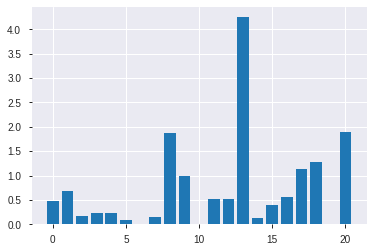

Feature 1: 0.684308


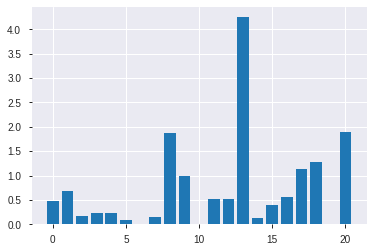

Feature 2: 0.167366


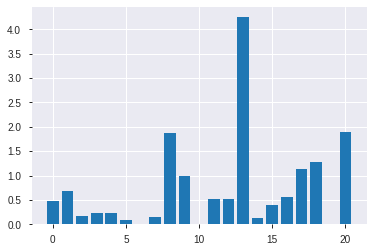

Feature 3: 0.237848


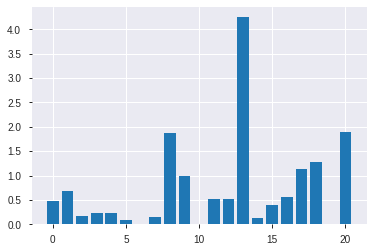

Feature 4: 0.237848


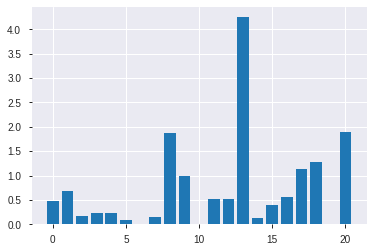

Feature 5: 0.093507


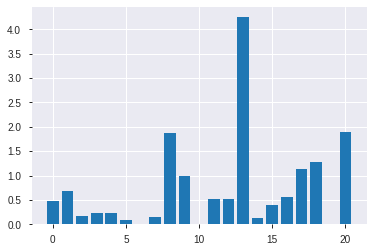

Feature 6: 0.007999


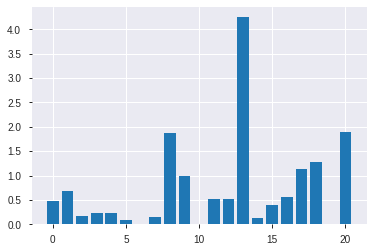

Feature 7: 0.158361


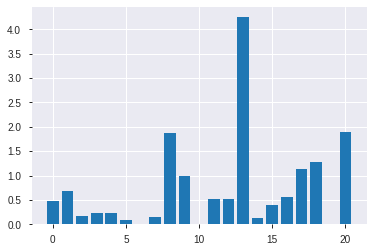

Feature 8: 1.881442


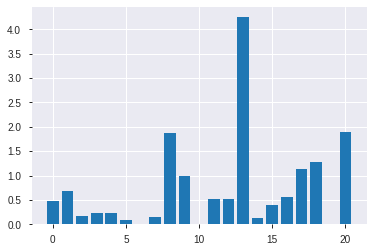

Feature 9: 1.000391


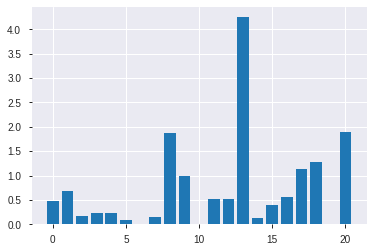

Feature 10: 0.000323


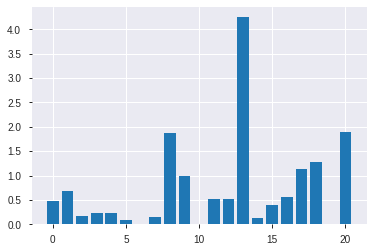

Feature 11: 0.514134


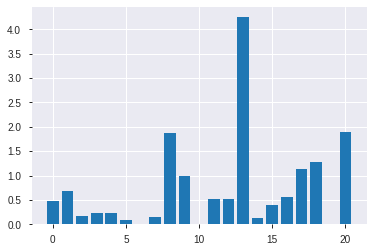

Feature 12: 0.528579


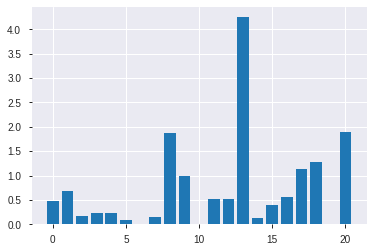

Feature 13: 4.245295


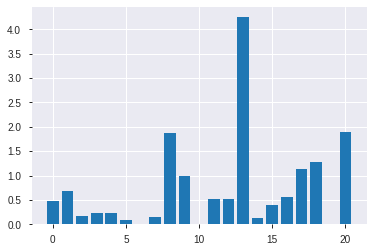

Feature 14: 0.138948


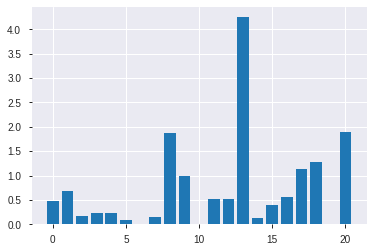

Feature 15: 0.402349


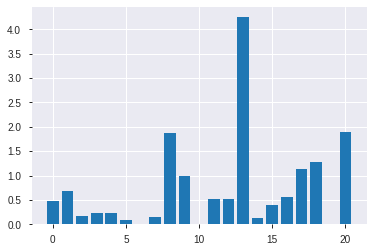

Feature 16: 0.560711


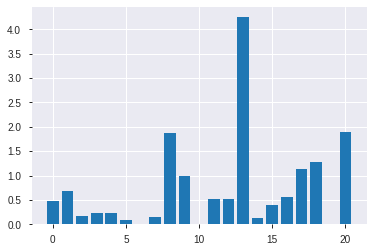

Feature 17: 1.131025


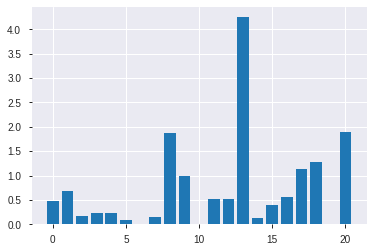

Feature 18: 1.270130


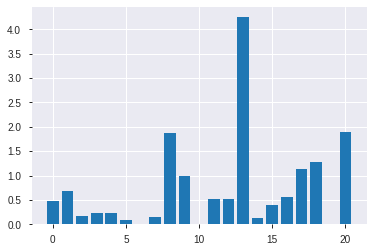

Feature 19: 0.006233


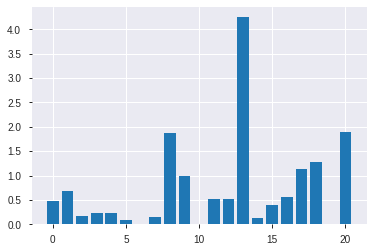

Feature 20: 1.898161


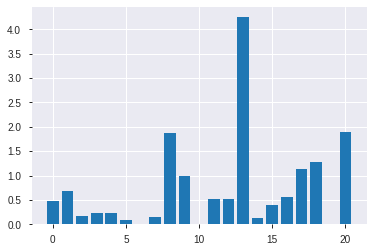

In [72]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.show()

<a name = section53></a>
### **5.3 Data Scaling**

- Using Pipeline mechanism.

In [73]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [74]:
normalizer.adapt(np.array(X_train))

In [75]:
print(normalizer.mean.numpy())

[[7.11997223e+01 3.38712859e+00 1.99537643e+02 5.01565075e+00
  5.01565075e+00 2.80002289e+02 6.13455415e-01 2.64814735e-04
  5.01738205e+01 3.23897290e+03 3.29583287e-01 3.47685181e-02
  1.62036959e-02 2.71759164e-02 1.21249944e-01 1.17453746e-01
  5.09258767e-04 6.02314956e-02 1.38888834e-04 1.66203585e-02
  9.98518288e-01]]


<a name = section6></a>

---
# **6. Model Development & Evaluation**
---


<a name=section61></a>

### **6.1 Build the Model**

- Let's build our model.

- Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value.
  
  - Previously, we use the `model.add()` method to **add layers** to our sequential model.

  - Here, we will directly **pass** all our *model layers* as **list items**.

  - We achive same result in both ways.

- The model building steps are wrapped in a function, `build_and_compile_model`

In [76]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [77]:
dnn_model = build_and_compile_model(normalizer)

<a name=section62></a>

### **6.2 Inspect the Model**

- Using the `.summary` method to print a simple description of the model

In [78]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 21)               43        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,676
Trainable params: 5,633
Non-trainable params: 43
_________________________________________________________________


In [79]:
%%time
history = dnn_model.fit(X_train,y_train,
    # Calculate validation results on 20% of the training data.
    validation_split=0.2,
    # Suppress logging.
    verbose=0, epochs=100)

CPU times: user 2min 43s, sys: 18.9 s, total: 3min 2s
Wall time: 2min 32s


In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,epoch
95,70.825958,83.199425,73.454620,86.087349,95
96,70.860130,83.234093,73.302185,85.766251,96
97,70.830391,83.160133,73.288742,85.749939,97
98,70.783081,83.132141,73.375870,86.022377,98
99,70.795403,83.169083,73.289627,85.771187,99


In [89]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [AQI]')
  plt.legend()
  plt.grid(True)

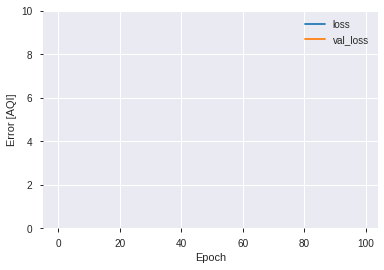

In [90]:
plot_loss(history)

In [84]:
test_results = {}

In [85]:
test_results['dnn_model'] = dnn_model.evaluate(X_valid, y_valid, verbose=0)

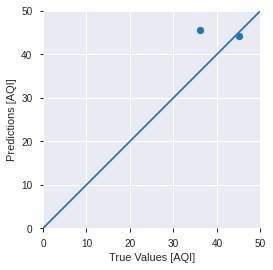

In [86]:
test_predictions = dnn_model.predict(X_valid).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_valid, test_predictions)
plt.xlabel('True Values [AQI]')
plt.ylabel('Predictions [AQI]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

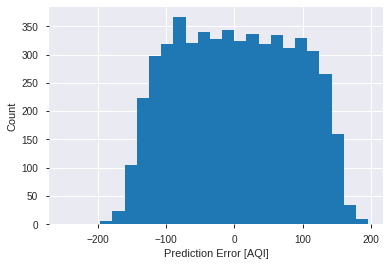

In [87]:
error = test_predictions - y_valid
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [AQI]')
_ = plt.ylabel('Count')

In [95]:
y_test_pred = dnn_model.predict(X_test).flatten()

In [96]:
y_test_pred

array([160.72426, 163.34512, 143.59076, ..., 154.71985, 147.23726,
       151.53781], dtype=float32)

In [97]:
output = pd.DataFrame({'Id': test_df.index,'air_pollution_index': y_test_pred})
output.to_csv('air-quality-index-submission1.csv', index=False, header=False)

**Thank you and Happy Learning.**

---

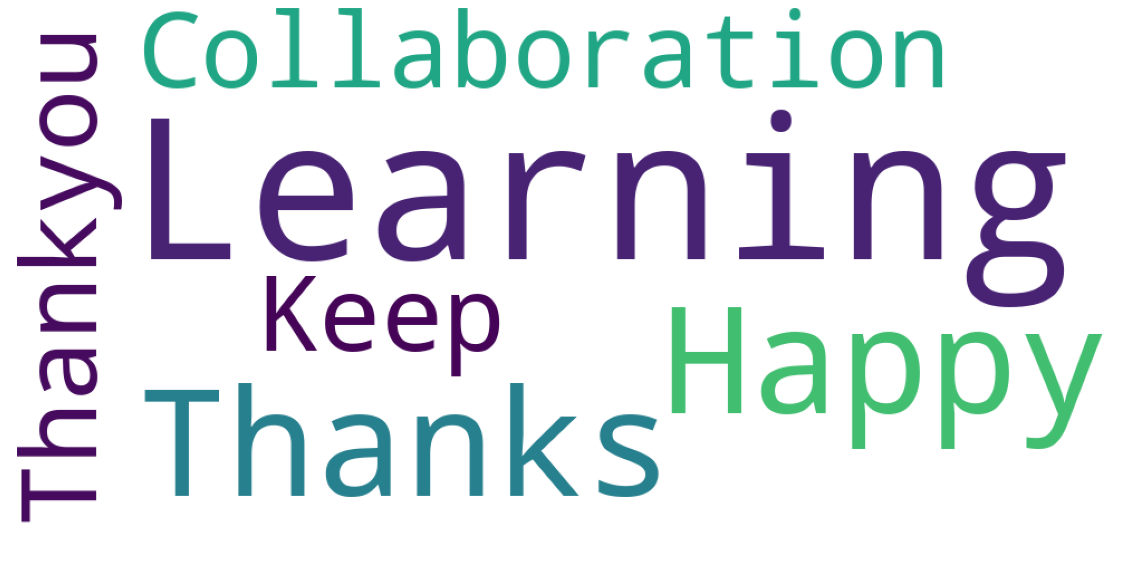

In [88]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()